In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
def load_excel_table(file_path):
    try:
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Greška prilikom učitavanja Excel tabele: {e}")
        return None

# Funkcija za izdvajanje broja pacijenta i slice-a iz naziva slike
def extract_patient_and_slice_info(image_name):
    # Pretpostavljamo da je format slike: "Breast_MRI_XXX_im_YYY_filt.png"
    parts = image_name.split('_')
    patient_id = int(parts[2])  # Treći dio je broj pacijenta (XXX)
    slice_id = int(parts[4].split('.')[0])  # Peti dio (im_YYY) je broj slice-a
    return patient_id, slice_id

# Funkcija za analizu preklapanja po pacijentima
def analyze_overlap_per_patient(df):
    print("Analiza preklapanja po pacijentima...")

    # Dodavanje kolona za broj pacijenta i slice-a
    df['Patient ID'], df['Slice ID'] = zip(*df['Ime slike'].apply(extract_patient_and_slice_info))

    # Grupisanje po pacijentima i provjeravanje da li je na bar jednom slice-u došlo do preklapanja
    overlap_per_patient = df.groupby('Patient ID')['Procenat piksela srca unutar supljine'].apply(lambda x: any(x > 0))

    # Broj pacijenata kod kojih je došlo do preklapanja
    num_patients_with_overlap = overlap_per_patient.sum()
    total_patients = overlap_per_patient.shape[0]
    overlap_percentage = (num_patients_with_overlap / total_patients) * 100

    # Izračunavanje prosječnog preklapanja za pacijente sa preklapanjem (makar jedno preklapanje po slice-u)
    average_overlap_per_patient = df[df['Patient ID'].isin(overlap_per_patient[overlap_per_patient].index)]
    average_overlap = average_overlap_per_patient.groupby('Patient ID')['Procenat piksela srca unutar supljine'].mean().mean()

    # Broj pacijenata kod kojih je preklapanje veće od 90%
    patients_with_high_overlap = average_overlap_per_patient[average_overlap_per_patient['Procenat piksela srca unutar supljine'] > 90]
    num_patients_with_high_overlap = patients_with_high_overlap['Patient ID'].nunique()
    
    # Procjena procenata pacijenata sa preklapanjem većim od 90%
    percentage_patients_with_high_overlap = (num_patients_with_high_overlap / total_patients) * 100

    print(f"Pacijenata sa preklapanjem: {num_patients_with_overlap} od ukupno {total_patients} ({overlap_percentage:.2f}%)")
    print(f"Prosečno preklapanje kod pacijenata sa preklapanjem: {average_overlap:.2f}%")
    print(f"Pacijenata sa preklapanjem preko 90%: {num_patients_with_high_overlap} od ukupno {total_patients} ({percentage_patients_with_high_overlap:.2f}%)")

    return num_patients_with_overlap, total_patients, overlap_percentage, average_overlap, num_patients_with_high_overlap, percentage_patients_with_high_overlap, overlap_per_patient


# Glavna funkcija za analizu i čuvanje rezultata
def analyze_overlap(excel_input_path):
    df = load_excel_table(excel_input_path)

    if df is not None:
        # Analiziraj preklapanje po pacijentima
        num_patients_with_overlap, total_patients, overlap_percentage, average_overlap, num_patients_with_high_overlap, percentage_patients_with_high_overlap, overlap_per_patient = analyze_overlap_per_patient(df)
        labels = [
        'Pacijenti sa preklapanjem',
        'Prosečno preklapanje (%)',
        'Pacijenti sa preklapanjem > 90%'
        ]
        values = [
        overlap_percentage,
        average_overlap,
        percentage_patients_with_high_overlap
        ]

        # Boje za bar chart
        colors = ['#4C72B0',  '#55A868',  '#C44E52']
        x_pos = np.arange(len(labels)) * 2

        plt.figure(figsize=(8,5))
        bars = plt.bar(x_pos, values, color=colors, width=0.8)

        
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

        plt.xticks(x_pos, labels)
        plt.title('Analiza preklapanja po pacijentima')
        plt.ylabel('Broj pacijenata / Prosečno (%)')
        plt.ylim(0, max(values)*1.2)  
        plt.show()


Analiza preklapanja po pacijentima...
Pacijenata sa preklapanjem: 533 od ukupno 538 (99.07%)
Prosečno preklapanje kod pacijenata sa preklapanjem: 84.72%
Pacijenata sa preklapanjem preko 90%: 417 od ukupno 538 (77.51%)


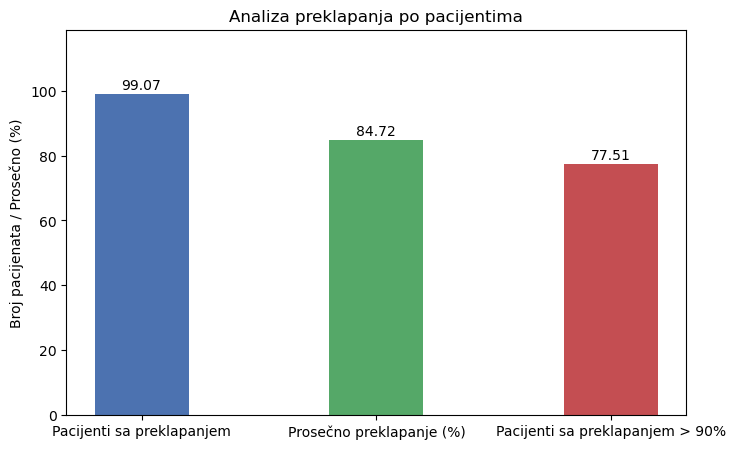

In [54]:
# ------------prvi pristup-----------------
excel_input_path = r'koeficijenti_korelacije/rezultati_procenat_preklapanja.xlsx'
# Pokretanje analize
analyze_overlap(excel_input_path)

Analiza preklapanja po pacijentima...
Pacijenata sa preklapanjem: 533 od ukupno 538 (99.07%)
Prosečno preklapanje kod pacijenata sa preklapanjem: 84.67%
Pacijenata sa preklapanjem preko 90%: 417 od ukupno 538 (77.51%)


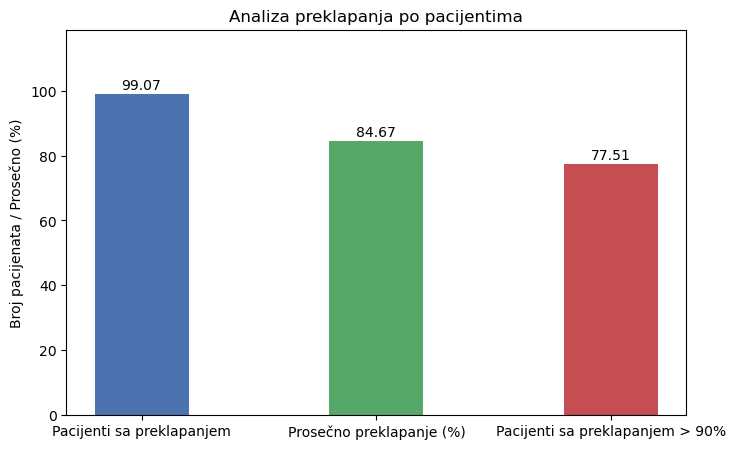

In [56]:
#--------------------drugi pristup-------------------------
excel_input_path = r'koeficijenti_korelacije/rezultati_procenat_preklapanja_multiscale.xlsx'
# Pokretanje analize
analyze_overlap(excel_input_path)